# K-Nearest Neighbor

In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Dataset loading
import sys
sys.path.append("..")
from Functions.UNSW_DF import *
x_train, x_test, y_train, y_test = DF_XY()

( 1 ) Reading Preprocessed CSV files..
	 Training dataset loaded..
	 Testing dataset loaded..

( 2 ) Loading done, splitting into X and Y..
	 ( 2.1 ) x_train Shape:  	 (175341, 53)
	 ( 2.2 ) y_train Shape:  	 (175341,)
	 ( 2.3 ) x_test Shape:  	 (82332, 53)
	 ( 2.4 ) y_test Shape:  	 (82332,)
( 3 ) Done!
PS! Import with: x_train, x_test, y_train, y_test = XY_import()


In [2]:
error_test = []
K_value = []
train_acc = []
test_acc = []
precision_score = []
F1_score = []
recall_score = []

# Calculating error for K values between 1 and 200 and appending scores to lists
for i in range(1, 71):
    knn = KNeighborsClassifier(n_neighbors=i, n_jobs=-1)
    knn.fit(x_train, y_train)
    pred_i_test = knn.predict(x_test)
    pred_i_train = knn.predict(x_train)
    
    # Appending values to list
    error_test.append(np.mean(pred_i_test != y_test))
    K_value.append(i)
    train_acc.append(metrics.accuracy_score(y_train, pred_i_train))
    test_acc.append(metrics.accuracy_score(y_test, pred_i_test))
    precision_score.append(metrics.precision_score(y_test, pred_i_test))
    F1_score.append(metrics.f1_score(y_test, pred_i_test))
    recall_score.append(metrics.recall_score(y_test, pred_i_test))
    

In [4]:
# Creating a dataframe and saving to file
# dictionary of lists 
dict = {
        'K': K_value,
        'train_acc': train_acc, 
        'test_acc': test_acc, 
        'precision': precision_score,
        'F1': F1_score,
        'recall': recall_score,
        'error': error_test
        }

df = pd.DataFrame(dict, index=K_value)
df.set_index("K", inplace = True)
df
# EXPORT AS CSV when done.
df.to_csv('K_SCORES(1-70).csv')

In [5]:
dataframe = pd.read_csv("K_SCORES(1-70).csv")

In [6]:
dataframe

,K,train_acc,test_acc,precision,F1,recall,error
0,1,0.997120,0.852791,0.814889,0.876412,0.947984,0.147209
1,2,0.965216,0.871083,0.857034,0.887027,0.919196,0.128917
2,3,0.967167,0.850896,0.805825,0.876469,0.960690,0.149104
3,4,0.958498,0.863188,0.831969,0.883449,0.941719,0.136812
4,5,0.958766,0.846281,0.797791,0.873688,0.965543,0.153719
...,...,...,...,...,...,...,...
65,66,0.941679,0.827297,0.766648,0.862848,0.986654,0.172703
66,67,0.941354,0.825839,0.764631,0.861980,0.987735,0.174161
67,68,0.941554,0.827054,0.766285,0.862710,0.986897,0.172946
68,69,0.941331,0.825791,0.764515,0.861966,0.987889,0.174209


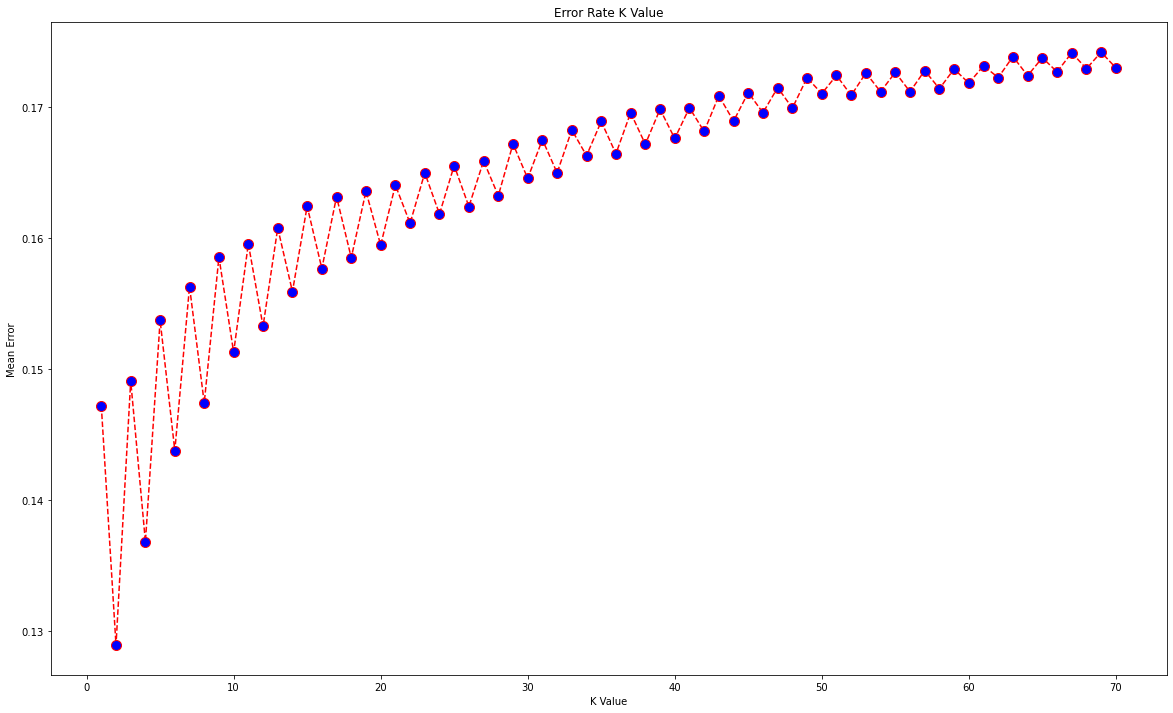

In [10]:
plt.figure(figsize=(20, 12))
plt.plot(range(1, 71), error_test, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.savefig('KNN(1-70)_v3.png', dpi=40, transparent=True)
plt.show()

In [ ]:
new_dataframe = pd.read_csv("K_SCORES(1-200).csv")
new_dataframe

In [ ]:
new_dataframe.set_index("K", inplace=True)
new_dataframe